## - 불러올 패키지 목록

In [1]:
# 수학 함수 패키지
import math

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.formula.api import *
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # 변수선택 알고리즘 포함
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

## Boston 주택 가격 dataset 사용

* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

# 데이터 불러오기 및 전처리

## 데이터프레임 생성

In [3]:
df_house = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\rawdata\housing.csv')

df_house

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df_house.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
df_house = df_house[['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
df_house

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


## 데이터 정보 확인

In [6]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MEDV     506 non-null    float64
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    int64  
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [15]:
# 결측치 개수 확인
df_house.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [17]:
# 기술 통계량 확인
df_house.describe().T

,count,mean,std,min,25%,50%,75%,max
MEDV,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


array([[<AxesSubplot:title={'center':'MEDV'}>,
        <AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>],
       [<AxesSubplot:title={'center':'CHAS'}>,
        <AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>],
       [<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

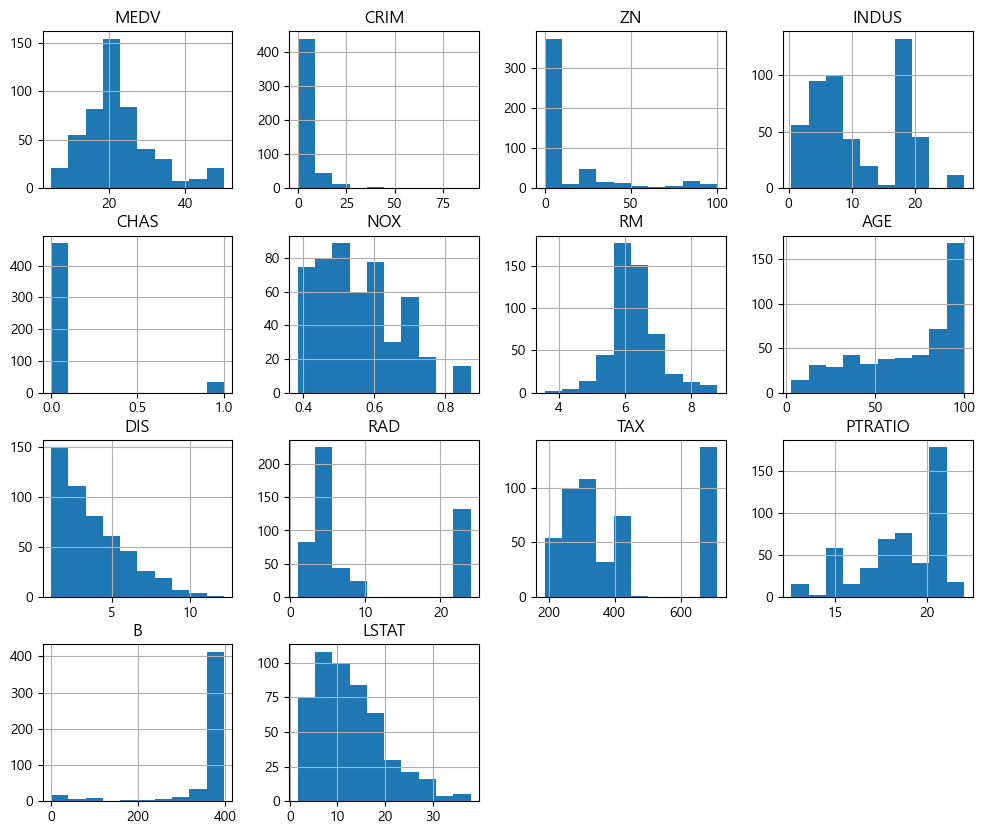

In [9]:
df_house.hist( figsize=(12, 10))

## 스케일링 수행

### Log Transform

In [7]:
df_house_log = np.log1p(df_house)

df_house_log

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.218876,0.006300,2.944439,1.196948,0.0,0.430483,2.024853,4.192680,1.627278,0.693147,5.693732,2.791165,5.986201,1.788421
1,3.117950,0.026944,0.000000,2.088153,0.0,0.384582,2.004314,4.380776,1.786261,1.098612,5.493061,2.933857,5.986201,2.316488
2,3.575151,0.026924,0.000000,2.088153,0.0,0.384582,2.102303,4.128746,1.786261,1.098612,5.493061,2.933857,5.975919,1.615420
3,3.538057,0.031857,0.000000,1.156881,0.0,0.377066,2.079192,3.845883,1.954757,1.386294,5.407172,2.980619,5.980479,1.371181
4,3.616309,0.066770,0.000000,1.156881,0.0,0.377066,2.097650,4.010963,1.954757,1.386294,5.407172,2.980619,5.986201,1.845300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.152736,0.060747,0.000000,2.559550,0.0,0.452985,2.027227,4.249923,1.246630,0.693147,5.613128,3.091042,5.973784,2.367436
502,3.072693,0.044275,0.000000,2.559550,0.0,0.452985,1.962908,4.352855,1.190127,0.693147,5.613128,3.091042,5.986201,2.310553
503,3.214868,0.058986,0.000000,2.559550,0.0,0.452985,2.076437,4.521789,1.152943,0.693147,5.613128,3.091042,5.986201,1.893112
504,3.135494,0.103991,0.000000,2.559550,0.0,0.452985,2.053354,4.503137,1.220505,0.693147,5.613128,3.091042,5.977492,2.012233


### Standard Scaled

In [8]:
df_scaled = StandardScaler().fit_transform(df_house_log.iloc[:,:])

df_scaled

array([[ 0.34517601, -0.78995997,  1.22932964, ..., -1.44553546,
         0.31108607, -1.2761181 ],
       [ 0.08410426, -0.7697552 , -0.58909073, ..., -0.23432428,
         0.31108607, -0.29549095],
       [ 1.26677575, -0.76977425, -0.58909073, ..., -0.23432428,
         0.29697693, -1.59738213],
       ...,
       [ 0.3348082 , -0.73839446, -0.58909073, ...,  1.09991488,
         0.31108607, -1.081705  ],
       [ 0.12948729, -0.69434626, -0.58909073, ...,  1.09991488,
         0.29913562, -0.86049628],
       [-1.36635394, -0.7507904 , -0.58909073, ...,  1.09991488,
         0.31108607, -0.54189116]])

In [9]:
# 스테일링된 값을 데이터프레임에 입력

for i in list(range(0,14,1)):
    df_house.iloc[:,i] = df_scaled[:, i]

df_house

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.345176,-0.789960,1.229330,-1.667618,-0.272599,-0.111204,0.453447,0.136758,0.357474,-1.812467,-0.609011,-1.445535,0.311086,-1.276118
1,0.084104,-0.769755,-0.589091,-0.322821,-0.272599,-0.741058,0.240390,0.456001,0.742438,-1.272635,-1.117107,-0.234324,0.311086,-0.295491
2,1.266776,-0.769774,-0.589091,-0.322821,-0.272599,-0.741058,1.256834,0.028245,0.742438,-1.272635,-1.117107,-0.234324,0.296977,-1.597382
3,1.170822,-0.764946,-0.589091,-1.728078,-0.272599,-0.844197,1.017096,-0.451842,1.150436,-0.889619,-1.334579,0.162604,0.303235,-2.050937
4,1.373242,-0.730775,-0.589091,-1.728078,-0.272599,-0.844197,1.208564,-0.171661,1.150436,-0.889619,-1.334579,0.162604,0.311086,-1.170492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.174088,-0.736671,-0.589091,0.388500,-0.272599,0.197566,0.478066,0.233912,-0.564233,-1.812467,-0.813100,1.099915,0.294047,-0.200880
502,-0.032964,-0.752792,-0.589091,0.388500,-0.272599,0.197566,-0.189116,0.408613,-0.701049,-1.812467,-0.813100,1.099915,0.311086,-0.306512
503,0.334808,-0.738394,-0.589091,0.388500,-0.272599,0.197566,0.988524,0.695334,-0.791089,-1.812467,-0.813100,1.099915,0.311086,-1.081705
504,0.129487,-0.694346,-0.589091,0.388500,-0.272599,0.197566,0.749086,0.663679,-0.627491,-1.812467,-0.813100,1.099915,0.299136,-0.860496


array([[<AxesSubplot:title={'center':'MEDV'}>,
        <AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>],
       [<AxesSubplot:title={'center':'CHAS'}>,
        <AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>],
       [<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

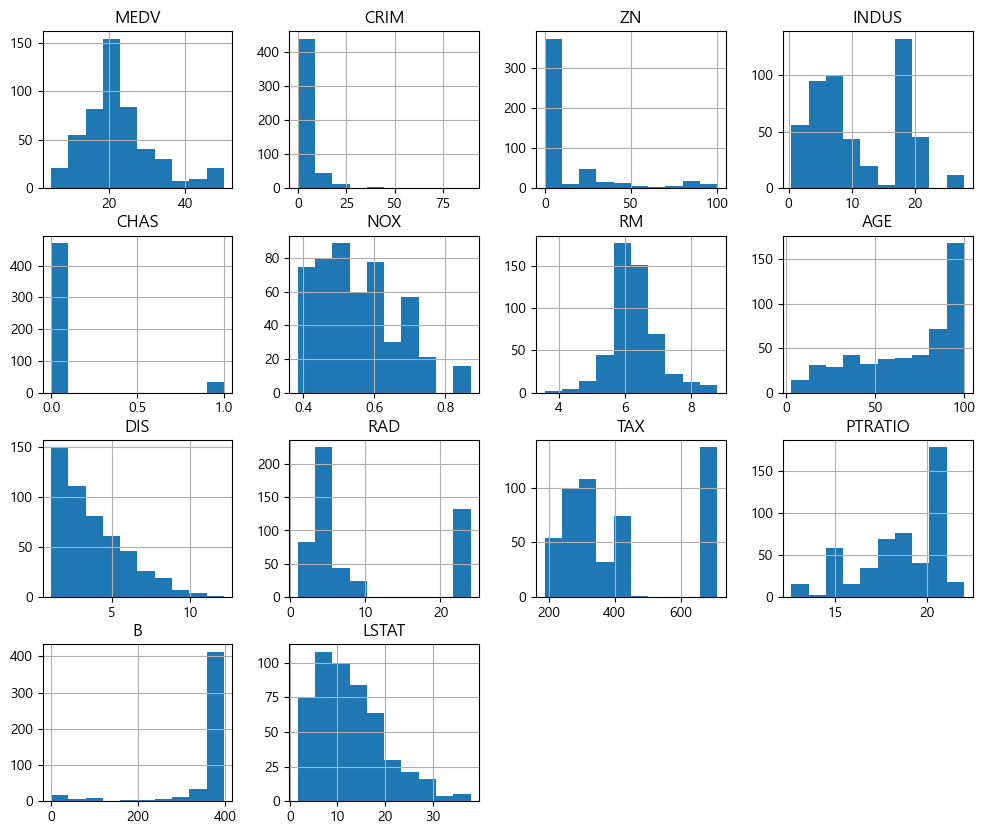

In [9]:
df_house.hist( figsize=(12, 10))

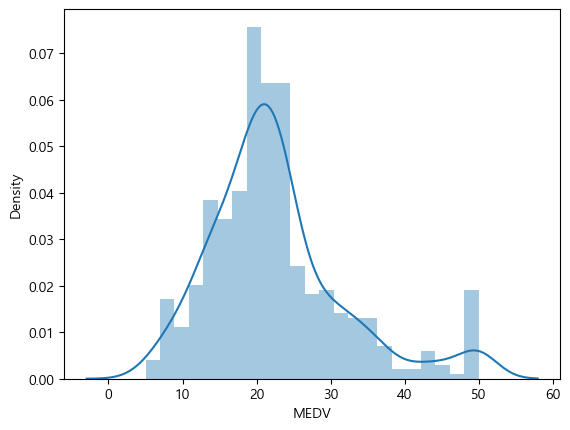

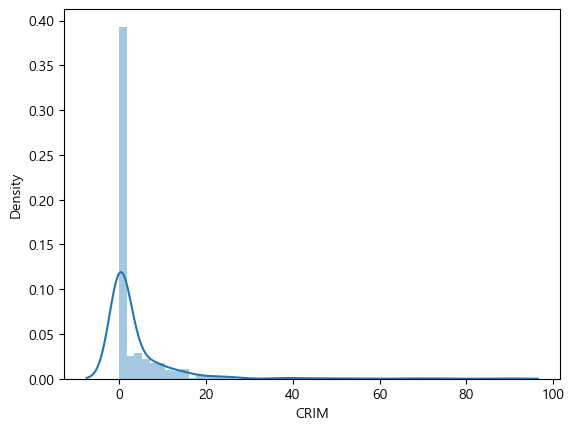

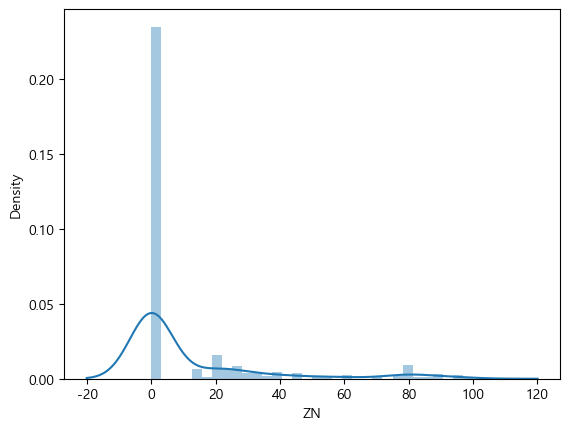

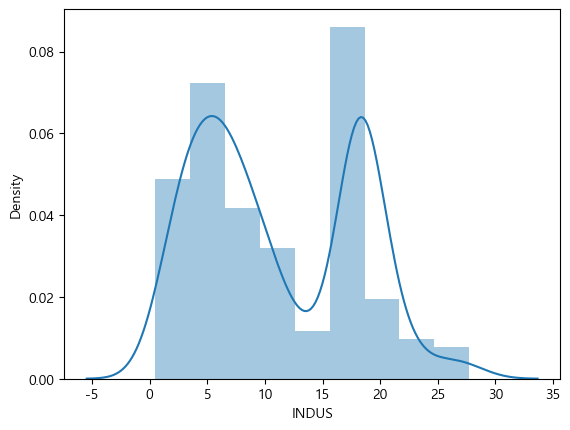

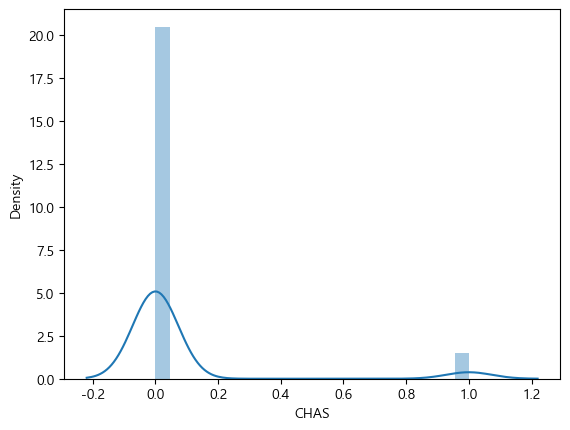

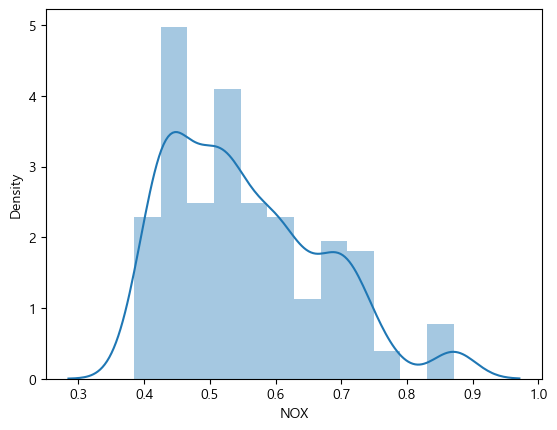

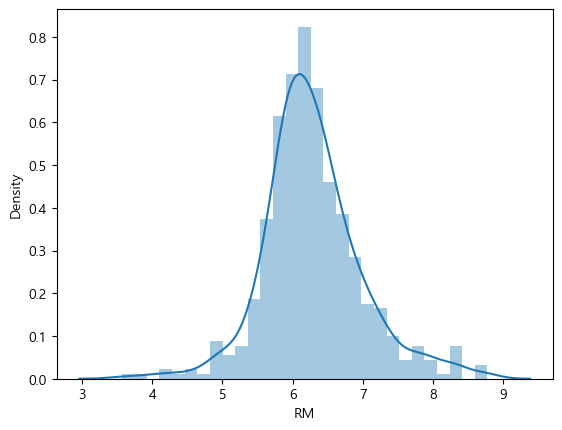

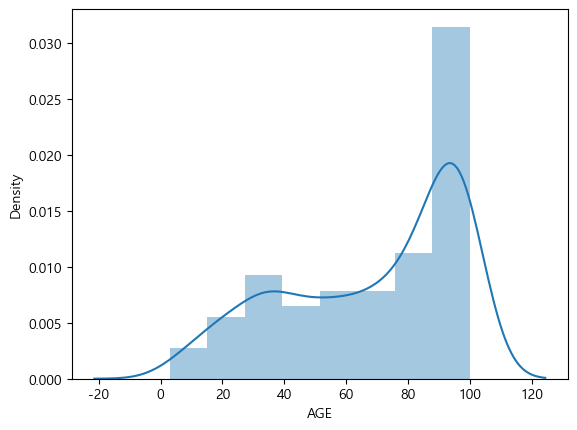

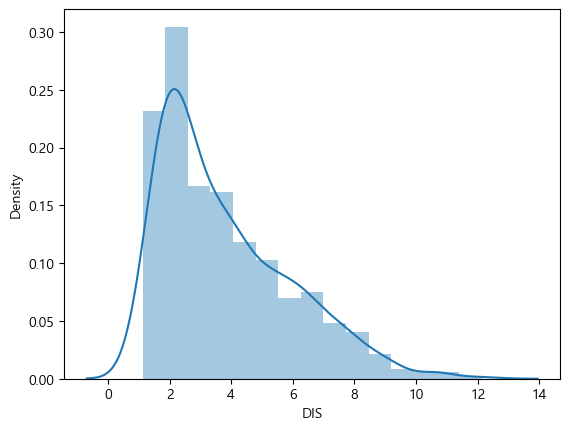

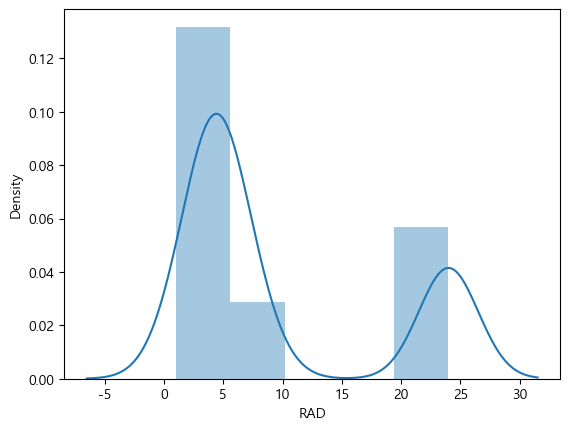

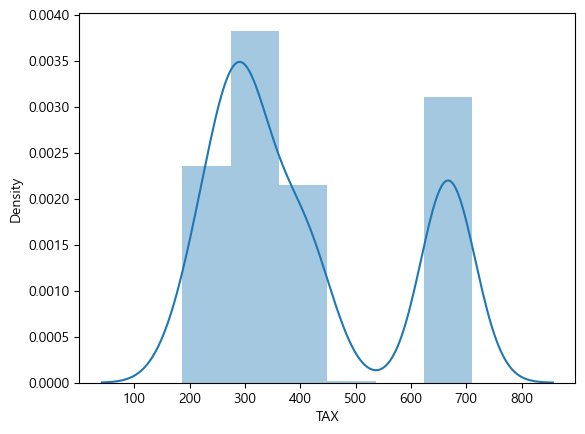

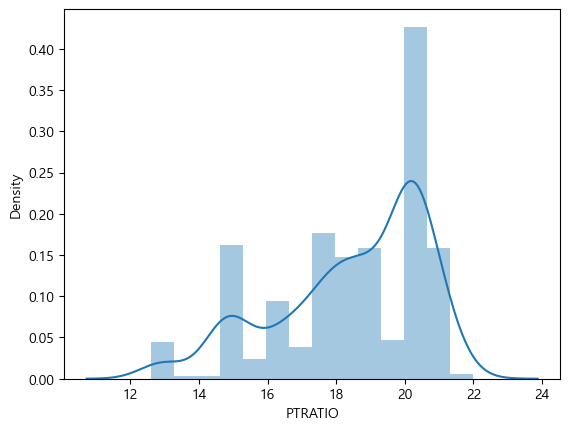

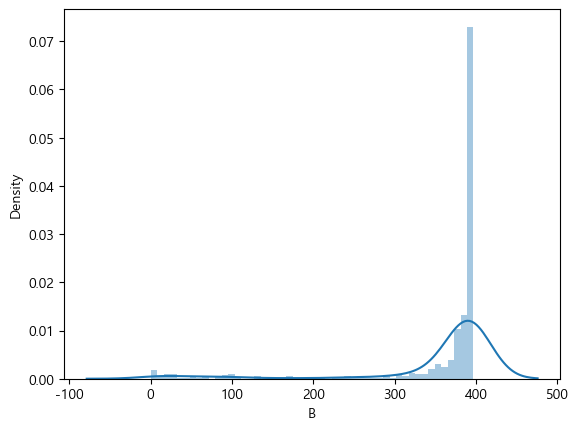

In [19]:
for i in list(range(0,13)):
    sb.distplot(df_house.iloc[:,i], kde=True)
    plt.show()

# 일반 선형 회귀분석

In [10]:
x = df_house.iloc[:, 1:14]
x = add_constant(x)

y = df_house.iloc[:, 0]

model = OLS( y, x )

fit_model = model.fit()

print( fit_model.summary() )

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     150.0
Date:                Thu, 02 Sep 2021   Prob (F-statistic):          1.09e-161
Time:                        01:33:56   Log-Likelihood:                -312.68
No. Observations:                 506   AIC:                             653.4
Df Residuals:                     492   BIC:                             712.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.274e-16      0.020   2.61e-14      1.0

### 다중공선성 확인

In [11]:
# VIF 확인
VIF = pd.DataFrame()

VIF['features'] = x.columns
VIF['VIF factor'] = [ variance_inflation_factor(x.values, i) for i in range(x.shape[1]) ]

VIF.round(3)

,features,VIF factor
0,const,1.000
1,CRIM,6.027
2,ZN,2.469
3,INDUS,3.884
4,CHAS,1.084
5,NOX,5.026
6,RM,1.967
7,AGE,2.398
8,DIS,4.923
9,RAD,5.266


## 변수 선택

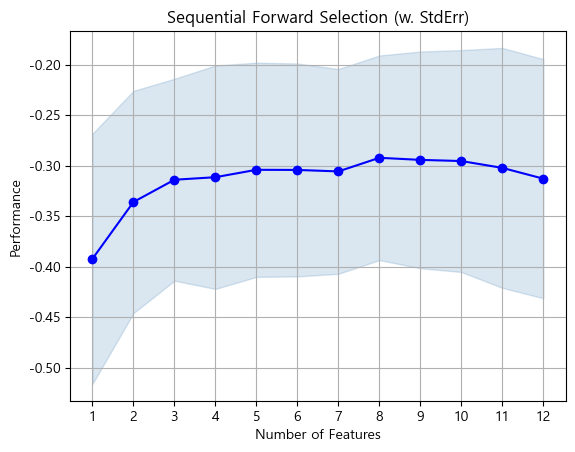

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)","[-0.1664721659654771, -0.3090951014531575, -0....",-0.392289,"(LSTAT,)",0.343721,0.214426,0.123799
2,"(10, 12)","[-0.13896965293020594, -0.2652863615469442, -0...",-0.336065,"(PTRATIO, LSTAT)",0.305334,0.190479,0.109973
3,"(10, 11, 12)","[-0.12721448917054357, -0.24450751838818022, -...",-0.314038,"(PTRATIO, B, LSTAT)",0.277371,0.173034,0.099901
4,"(5, 10, 11, 12)","[-0.10876804323509469, -0.2201183917487272, -0...",-0.311519,"(RM, PTRATIO, B, LSTAT)",0.306982,0.191507,0.110567
5,"(3, 5, 10, 11, 12)","[-0.10922764422311551, -0.22289587035483896, -...",-0.3042,"(CHAS, RM, PTRATIO, B, LSTAT)",0.29426,0.18357,0.105984
6,"(1, 3, 5, 10, 11, 12)","[-0.11005181783454646, -0.2281312762946357, -0...",-0.304333,"(ZN, CHAS, RM, PTRATIO, B, LSTAT)",0.292484,0.182463,0.105345
7,"(1, 3, 5, 9, 10, 11, 12)","[-0.09831670141517099, -0.21179588151366974, -...",-0.305788,"(ZN, CHAS, RM, TAX, PTRATIO, B, LSTAT)",0.281296,0.175483,0.101315
8,"(0, 3, 6, 7, 8, 9, 10, 12)","[-0.10586460970946862, -0.20902078205562014, -...",-0.292328,"(CRIM, CHAS, AGE, DIS, RAD, TAX, PTRATIO, LSTAT)",0.281054,0.175332,0.101228
9,"(0, 3, 6, 7, 8, 9, 10, 11, 12)","[-0.1039468204120943, -0.2044961677436687, -0....",-0.294375,"(CRIM, CHAS, AGE, DIS, RAD, TAX, PTRATIO, B, L...",0.297761,0.185754,0.107245
10,"(0, 2, 3, 6, 7, 8, 9, 10, 11, 12)","[-0.10467175038138918, -0.20070766161399392, -...",-0.295529,"(CRIM, INDUS, CHAS, AGE, DIS, RAD, TAX, PTRATI...",0.30484,0.190171,0.109795


In [12]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

lr = LinearRegression()

sffs = SFS( lr, k_features=12,
            forward=True, floating=True,
            scoring='neg_mean_squared_error',
            cv=4, n_jobs=-1)

sffs.fit(x,y)

fig = plot_sfs(sffs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

pd.DataFrame.from_dict(sffs.get_metric_dict()).T

## 선택된 변수들로 회귀분석

In [13]:
x = df_house[['CRIM', 'CHAS', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
x = add_constant(x)

y = df_house.iloc[:, 0]

model = OLS( y, x )

fit_model = model.fit()

print( fit_model.summary() )

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     254.3
Date:                Thu, 02 Sep 2021   Prob (F-statistic):          5.99e-160
Time:                        01:34:04   Log-Likelihood:                -333.28
No. Observations:                 506   AIC:                             682.6
Df Residuals:                     498   BIC:                             716.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.274e-16      0.021   2.52e-14      1.0

### 다중공선성 확인

In [14]:
# VIF 확인
VIF = pd.DataFrame()

VIF['features'] = x.columns
VIF['VIF factor'] = [ variance_inflation_factor(x.values, i) for i in range(x.shape[1]) ]

VIF.round(3)

,features,VIF factor
0,const,1.000
1,CRIM,5.549
2,CHAS,1.050
3,DIS,1.989
4,RAD,5.164
5,TAX,4.146
6,PTRATIO,1.346
7,LSTAT,1.735


# Ridge 회귀

- `sklearn.linear_model.Ridge( alpha=1.0, *, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None )`  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [15]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Ridge(alpha = 10)
fit_model = model.fit(x,y)

In [16]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

     features         coeff
0   intercept  1.995944e-16
1        CRIM -3.201979e-01
2          ZN -1.999373e-02
3       INDUS -2.275311e-02
4        CHAS  6.182798e-02
5         NOX -1.600835e-01
6          RM  1.126337e-01
7         AGE  3.538833e-02
8         DIS -2.345688e-01
9         RAD  2.794207e-01
10        TAX -1.225922e-01
11    PTRATIO -1.780220e-01
12          B  8.193653e-02
13      LSTAT -5.710134e-01

 5 folds 의 개별 Negative MSE scores:  [-0.092 -0.138 -0.16  -0.612 -0.373]
 5 folds 의 개별 RMSE scores :  [0.303 0.372 0.4   0.783 0.611]
 5 folds 의 평균 RMSE : 0.494 



In [17]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.7974
Adj. R-squared : 0.7921

F-statistic : 148.9852
p-value (of F-stat.) 0.0

      Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0   Intercept        0.0000            0.020        0.000          1.000
1        CRIM       -0.3202            0.050       -6.428          0.000
2          ZN       -0.0200            0.032       -0.627          0.531
3       INDUS       -0.0228            0.040       -0.569          0.570
4        CHAS        0.0618            0.021        2.927          0.004
5         NOX       -0.1601            0.045       -3.519          0.000
6          RM        0.1126            0.028        3.958          0.000
7         AGE        0.0354            0.031        1.126          0.261
8         DIS       -0.2346            0.045       -5.210          0.000
9         RAD        0.2794            0.047        6.001          0.000
10        TAX       -0.1226            0.044       -2.798          0.005
11    PTRATIO       -0.1780    

## RMSE 가 최소인 조건 탐색

alpha 0 일 때 5 folds 의 평균 RMSE : 0.503 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 0.502 
alpha 1 일 때 5 folds 의 평균 RMSE : 0.501 
alpha 10 일 때 5 folds 의 평균 RMSE : 0.494 
alpha 50 일 때 5 folds 의 평균 RMSE : 0.491 
alpha 100 일 때 5 folds 의 평균 RMSE : 0.504 
alpha 150 일 때 5 folds 의 평균 RMSE : 0.519 
alpha 200 일 때 5 folds 의 평균 RMSE : 0.535 
alpha 500 일 때 5 folds 의 평균 RMSE : 0.606 


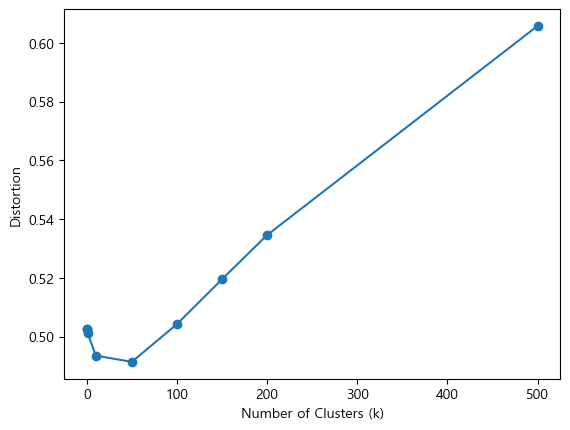

In [18]:
# 조건 탐색에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 50, 100, 150, 200, 500]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
rmse_result = list()

for alpha in alphas :
    model = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    rmse_result.append(avg_rmse)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))
    
# alpha 에 따른 rmse의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot( alphas, rmse_result, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

alpha 20 일 때 5 folds 의 평균 RMSE : 0.49010 
alpha 22 일 때 5 folds 의 평균 RMSE : 0.48978 
alpha 24 일 때 5 folds 의 평균 RMSE : 0.48954 
alpha 26 일 때 5 folds 의 평균 RMSE : 0.48939 
alpha 28 일 때 5 folds 의 평균 RMSE : 0.48930 
alpha 30 일 때 5 folds 의 평균 RMSE : 0.48928 
alpha 32 일 때 5 folds 의 평균 RMSE : 0.48931 
alpha 34 일 때 5 folds 의 평균 RMSE : 0.48939 
alpha 36 일 때 5 folds 의 평균 RMSE : 0.48952 
alpha 38 일 때 5 folds 의 평균 RMSE : 0.48968 
alpha 40 일 때 5 folds 의 평균 RMSE : 0.48989 
alpha 42 일 때 5 folds 의 평균 RMSE : 0.49013 
alpha 44 일 때 5 folds 의 평균 RMSE : 0.49040 
alpha 46 일 때 5 folds 의 평균 RMSE : 0.49069 
alpha 48 일 때 5 folds 의 평균 RMSE : 0.49102 


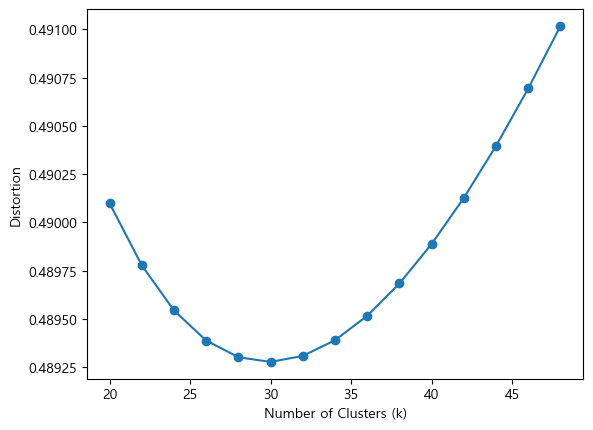

In [19]:
# 조건 탐색에 사용될 alpha 파라미터의 값들을 정의
alphas = list(range(20, 50, 2))

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
rmse_result = list()

for alpha in alphas :
    model = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    rmse_result.append(avg_rmse)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.5f} '.format(alpha,avg_rmse))
    
# alpha 에 따른 rmse의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot( alphas, rmse_result, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

## 최소 RMSE 조건으로 회귀분석 수행

In [20]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Ridge(alpha = 30)
fit_model = model.fit(x,y)

In [21]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()


# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

     features         coeff
0   intercept  2.563751e-16
1        CRIM -2.597075e-01
2          ZN -2.186273e-02
3       INDUS -2.908677e-02
4        CHAS  6.607438e-02
5         NOX -1.343462e-01
6          RM  1.357569e-01
7         AGE  2.463311e-02
8         DIS -1.910976e-01
9         RAD  2.079005e-01
10        TAX -1.081295e-01
11    PTRATIO -1.685049e-01
12          B  8.755061e-02
13      LSTAT -5.300553e-01

 5 folds 의 개별 Negative MSE scores:  [-0.08  -0.126 -0.152 -0.641 -0.383]
 5 folds 의 개별 RMSE scores :  [0.282 0.355 0.389 0.801 0.619]
 5 folds 의 평균 RMSE : 0.489 



In [22]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.7921
Adj. R-squared : 0.7867

F-statistic : 144.2342
p-value (of F-stat.) 0.0

      Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0   Intercept        0.0000            0.021        0.000          1.000
1        CRIM       -0.2597            0.050       -5.147          0.000
2          ZN       -0.0219            0.032       -0.677          0.499
3       INDUS       -0.0291            0.041       -0.718          0.473
4        CHAS        0.0661            0.021        3.088          0.002
5         NOX       -0.1343            0.046       -2.916          0.004
6          RM        0.1358            0.029        4.710          0.000
7         AGE        0.0246            0.032        0.774          0.439
8         DIS       -0.1911            0.046       -4.190          0.000
9         RAD        0.2079            0.047        4.408          0.000
10        TAX       -0.1081            0.044       -2.436          0.015
11    PTRATIO       -0.1685    

## t-통계량의 p값을 참고하여 유의하지 않은 변수 삭제하여 재진행

In [23]:
x = df_house.iloc[:, 1:14].drop(['ZN', 'INDUS', 'AGE'], axis =1)
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Ridge(alpha = 30)
fit_model = model.fit(x,y)

In [24]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()


# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

     features         coeff
0   intercept  2.610031e-16
1        CRIM -2.612843e-01
2        CHAS  6.569932e-02
3         NOX -1.316047e-01
4          RM  1.410121e-01
5         DIS -2.027878e-01
6         RAD  2.070085e-01
7         TAX -1.185942e-01
8     PTRATIO -1.643066e-01
9           B  8.823590e-02
10      LSTAT -5.234452e-01

 5 folds 의 개별 Negative MSE scores:  [-0.082 -0.125 -0.149 -0.625 -0.379]
 5 folds 의 개별 RMSE scores :  [0.286 0.354 0.386 0.791 0.616]
 5 folds 의 평균 RMSE : 0.487 



In [25]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.7912
Adj. R-squared : 0.787

F-statistic : 187.5846
p-value (of F-stat.) 0.0

      Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0   Intercept        0.0000            0.021        0.000          1.000
1        CRIM       -0.2613            0.050       -5.242          0.000
2        CHAS        0.0657            0.021        3.109          0.002
3         NOX       -0.1316            0.044       -2.982          0.003
4          RM        0.1410            0.028        5.034          0.000
5         DIS       -0.2028            0.039       -5.243          0.000
6         RAD        0.2070            0.047        4.394          0.000
7         TAX       -0.1186            0.043       -2.786          0.006
8     PTRATIO       -0.1643            0.025       -6.601          0.000
9           B        0.0882            0.023        3.807          0.000
10      LSTAT       -0.5234            0.034      -15.451          0.000



### 다중공선성 확인

In [26]:
# VIF 확인
VIF = pd.DataFrame()

VIF['features'] = newX.columns
VIF['VIF factor'] = [ variance_inflation_factor(newX.values, i) for i in range(newX.shape[1]) ]

VIF.round(3)

,features,VIF factor
0,Intercept,1.000
1,CRIM,5.889
2,CHAS,1.059
3,NOX,4.617
4,RM,1.860
5,DIS,3.546
6,RAD,5.263
7,TAX,4.297
8,PTRATIO,1.469
9,B,1.273


# Lasso 회귀

- `sklearn.linear_model.Lasso( alpha=1.0, *, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic' )`  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [27]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Lasso(alpha = 10)
fit_model = model.fit(x,y)

In [28]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

     features         coeff
0   intercept  6.459479e-16
1        CRIM -0.000000e+00
2          ZN  0.000000e+00
3       INDUS -0.000000e+00
4        CHAS  0.000000e+00
5         NOX -0.000000e+00
6          RM  0.000000e+00
7         AGE -0.000000e+00
8         DIS  0.000000e+00
9         RAD -0.000000e+00
10        TAX -0.000000e+00
11    PTRATIO -0.000000e+00
12          B  0.000000e+00
13      LSTAT -0.000000e+00

 5 folds 의 개별 Negative MSE scores:  [-0.405 -0.849 -1.431 -1.462 -1.629]
 5 folds 의 개별 RMSE scores :  [0.637 0.921 1.196 1.209 1.276]
 5 folds 의 평균 RMSE : 1.048 



In [29]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.0
Adj. R-squared : -0.0264

F-statistic : 0.0
p-value (of F-stat.) 1.0

      Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0   Intercept           0.0            0.045          0.0            1.0
1        CRIM          -0.0            0.111         -0.0            1.0
2          ZN           0.0            0.071          0.0            1.0
3       INDUS          -0.0            0.089         -0.0            1.0
4        CHAS           0.0            0.047          0.0            1.0
5         NOX          -0.0            0.101         -0.0            1.0
6          RM           0.0            0.063          0.0            1.0
7         AGE          -0.0            0.070         -0.0            1.0
8         DIS           0.0            0.100          0.0            1.0
9         RAD          -0.0            0.103         -0.0            1.0
10        TAX          -0.0            0.097         -0.0            1.0
11    PTRATIO          -0.0           

## RMSE 가 최소인 조건 탐색

alpha 0.0 일 때 5 folds 의 평균 RMSE : 0.50256 
alpha 0.001 일 때 5 folds 의 평균 RMSE : 0.50148 
alpha 0.002 일 때 5 folds 의 평균 RMSE : 0.50038 
alpha 0.003 일 때 5 folds 의 평균 RMSE : 0.49980 
alpha 0.004 일 때 5 folds 의 평균 RMSE : 0.49947 
alpha 0.005 일 때 5 folds 의 평균 RMSE : 0.49936 
alpha 0.006 일 때 5 folds 의 평균 RMSE : 0.49949 
alpha 0.007 일 때 5 folds 의 평균 RMSE : 0.49983 
alpha 0.008 일 때 5 folds 의 평균 RMSE : 0.50044 
alpha 0.009000000000000001 일 때 5 folds 의 평균 RMSE : 0.50143 
alpha 0.01 일 때 5 folds 의 평균 RMSE : 0.50264 
alpha 0.011 일 때 5 folds 의 평균 RMSE : 0.50401 
alpha 0.012 일 때 5 folds 의 평균 RMSE : 0.50555 
alpha 0.013000000000000001 일 때 5 folds 의 평균 RMSE : 0.50724 
alpha 0.014 일 때 5 folds 의 평균 RMSE : 0.50904 
alpha 0.015 일 때 5 folds 의 평균 RMSE : 0.51099 
alpha 0.016 일 때 5 folds 의 평균 RMSE : 0.51309 
alpha 0.017 일 때 5 folds 의 평균 RMSE : 0.51539 
alpha 0.018000000000000002 일 때 5 folds 의 평균 RMSE : 0.51785 
alpha 0.019 일 때 5 folds 의 평균 RMSE : 0.52046 


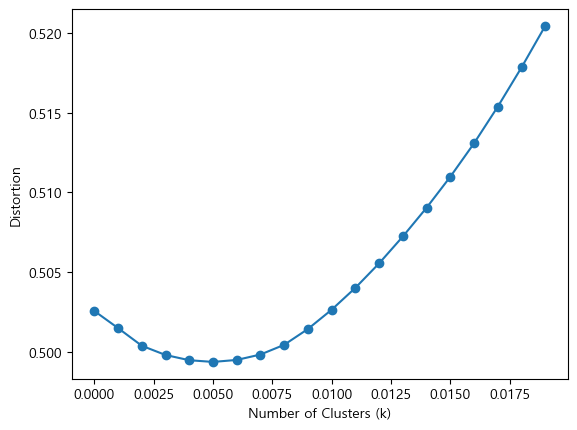

In [30]:
# 조건 탐색에 사용될 alpha 파라미터의 값들을 정의
alphas = np.arange(0, 0.02, 0.001)

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
rmse_result = list()

for alpha in alphas :
    model = Lasso(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    rmse_result.append(avg_rmse)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.5f} '.format(alpha,avg_rmse))
    
# alpha 에 따른 rmse의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot( alphas, rmse_result, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

## 최소 RMSE 조건으로 회귀분석 수행

In [31]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Lasso(alpha = 0.005)
fit_model = model.fit(x,y)

In [32]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

     features         coeff
0   intercept  2.008296e-16
1        CRIM -3.330076e-01
2          ZN -4.995961e-03
3       INDUS -4.597822e-03
4        CHAS  5.643371e-02
5         NOX -1.471564e-01
6          RM  1.007839e-01
7         AGE  3.492313e-02
8         DIS -2.340986e-01
9         RAD  2.799023e-01
10        TAX -1.209637e-01
11    PTRATIO -1.716961e-01
12          B  7.538664e-02
13      LSTAT -5.949112e-01

 5 folds 의 개별 Negative MSE scores:  [-0.099 -0.143 -0.171 -0.6   -0.378]
 5 folds 의 개별 RMSE scores :  [0.315 0.378 0.414 0.775 0.615]
 5 folds 의 평균 RMSE : 0.499 



In [33]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.7975
Adj. R-squared : 0.7921

F-statistic : 149.0031
p-value (of F-stat.) 0.0

      Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0   Intercept        0.0000            0.020        0.000          1.000
1        CRIM       -0.3330            0.050       -6.685          0.000
2          ZN       -0.0050            0.032       -0.157          0.876
3       INDUS       -0.0046            0.040       -0.115          0.909
4        CHAS        0.0564            0.021        2.671          0.008
5         NOX       -0.1472            0.045       -3.235          0.001
6          RM        0.1008            0.028        3.542          0.000
7         AGE        0.0349            0.031        1.111          0.267
8         DIS       -0.2341            0.045       -5.200          0.000
9         RAD        0.2799            0.047        6.012          0.000
10        TAX       -0.1210            0.044       -2.761          0.006
11    PTRATIO       -0.1717    

## t-통계량의 p값을 참고하여 유의하지 않은 변수 삭제하여 재진행

In [34]:
x = df_house.iloc[:, 1:14].drop(['ZN', 'INDUS', 'AGE'], axis =1)
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = Lasso(alpha = 0.005)
fit_model = model.fit(x,y)

In [35]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

     features         coeff
0   intercept  1.875574e-16
1        CRIM -3.365766e-01
2        CHAS  5.769635e-02
3         NOX -1.399089e-01
4          RM  1.073585e-01
5         DIS -2.512435e-01
6         RAD  2.811046e-01
7         TAX -1.264368e-01
8     PTRATIO -1.688816e-01
9           B  7.634876e-02
10      LSTAT -5.813388e-01

 5 folds 의 개별 Negative MSE scores:  [-0.101 -0.136 -0.165 -0.59  -0.376]
 5 folds 의 개별 RMSE scores :  [0.318 0.369 0.406 0.768 0.613]
 5 folds 의 평균 RMSE : 0.495 



In [36]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.7966
Adj. R-squared : 0.7925

F-statistic : 193.8361
p-value (of F-stat.) 0.0

      Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0   Intercept        0.0000            0.020        0.000          1.000
1        CRIM       -0.3366            0.049       -6.842          0.000
2        CHAS        0.0577            0.021        2.766          0.006
3         NOX       -0.1399            0.044       -3.212          0.001
4          RM        0.1074            0.028        3.883          0.000
5         DIS       -0.2512            0.038       -6.581          0.000
6         RAD        0.2811            0.047        6.044          0.000
7         TAX       -0.1264            0.042       -3.009          0.003
8     PTRATIO       -0.1689            0.025       -6.874          0.000
9           B        0.0763            0.023        3.337          0.001
10      LSTAT       -0.5813            0.033      -17.384          0.000



### 다중공선성 확인

In [37]:
# VIF 확인
VIF = pd.DataFrame()

VIF['features'] = newX.columns
VIF['VIF factor'] = [ variance_inflation_factor(newX.values, i) for i in range(newX.shape[1]) ]

VIF.round(3)

,features,VIF factor
0,Intercept,1.000
1,CRIM,5.889
2,CHAS,1.059
3,NOX,4.617
4,RM,1.860
5,DIS,3.546
6,RAD,5.263
7,TAX,4.297
8,PTRATIO,1.469
9,B,1.273


# Elastic Net 회귀

- `sklearn.linear_model.ElasticNet( alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic' )`  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [38]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = ElasticNet(alpha = 1)
fit_model = model.fit(x,y)

In [39]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

     features         coeff
0   intercept  6.336856e-16
1        CRIM -0.000000e+00
2          ZN  0.000000e+00
3       INDUS -0.000000e+00
4        CHAS  0.000000e+00
5         NOX -0.000000e+00
6          RM  0.000000e+00
7         AGE -0.000000e+00
8         DIS  0.000000e+00
9         RAD -0.000000e+00
10        TAX -0.000000e+00
11    PTRATIO -0.000000e+00
12          B  0.000000e+00
13      LSTAT -2.183098e-01

 5 folds 의 개별 Negative MSE scores:  [-0.202 -0.535 -1.026 -1.113 -1.229]
 5 folds 의 개별 RMSE scores :  [0.45  0.732 1.013 1.055 1.109]
 5 folds 의 평균 RMSE : 0.872 



In [40]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.3136
Adj. R-squared : 0.2955

F-statistic : 17.2933
p-value (of F-stat.) 0.0

      Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0   Intercept        0.0000            0.037        0.000          1.000
1        CRIM       -0.0000            0.092       -0.000          1.000
2          ZN        0.0000            0.059        0.000          1.000
3       INDUS       -0.0000            0.074       -0.000          1.000
4        CHAS        0.0000            0.039        0.000          1.000
5         NOX       -0.0000            0.084       -0.000          1.000
6          RM        0.0000            0.052        0.000          1.000
7         AGE       -0.0000            0.058       -0.000          1.000
8         DIS        0.0000            0.083        0.000          1.000
9         RAD       -0.0000            0.086       -0.000          1.000
10        TAX       -0.0000            0.081       -0.000          1.000
11    PTRATIO       -0.0000     

## RMSE 가 최소인 조건 탐색

alpha 0.0 일 때 5 folds 의 평균 RMSE : 0.50256 
alpha 0.01 일 때 5 folds 의 평균 RMSE : 0.49823 
alpha 0.02 일 때 5 folds 의 평균 RMSE : 0.50154 
alpha 0.03 일 때 5 folds 의 평균 RMSE : 0.50976 
alpha 0.04 일 때 5 folds 의 평균 RMSE : 0.52073 
alpha 0.05 일 때 5 folds 의 평균 RMSE : 0.52684 
alpha 0.06 일 때 5 folds 의 평균 RMSE : 0.53127 
alpha 0.07 일 때 5 folds 의 평균 RMSE : 0.53412 
alpha 0.08 일 때 5 folds 의 평균 RMSE : 0.53719 
alpha 0.09 일 때 5 folds 의 평균 RMSE : 0.54085 


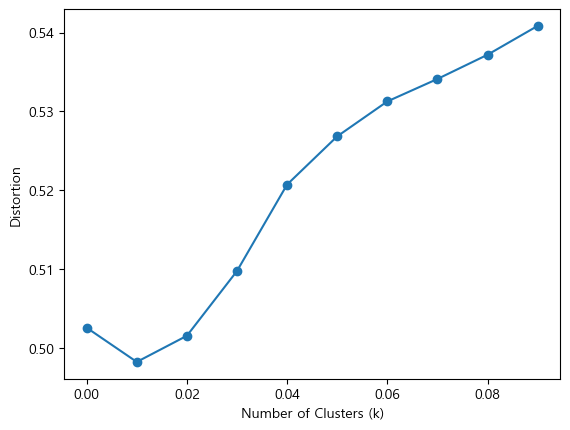

In [41]:
# 조건 탐색에 사용될 alpha 파라미터의 값들을 정의
alphas = np.arange(0, 0.1, 0.01)

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
rmse_result = list()

for alpha in alphas :
    model = ElasticNet(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    rmse_result.append(avg_rmse)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.5f} '.format(alpha,avg_rmse))
    
# alpha 에 따른 rmse의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot( alphas, rmse_result, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

alpha 0.0 일 때 5 folds 의 평균 RMSE : 0.50256 
alpha 0.001 일 때 5 folds 의 평균 RMSE : 0.50187 
alpha 0.002 일 때 5 folds 의 평균 RMSE : 0.50104 
alpha 0.003 일 때 5 folds 의 평균 RMSE : 0.50027 
alpha 0.004 일 때 5 folds 의 평균 RMSE : 0.49964 
alpha 0.005 일 때 5 folds 의 평균 RMSE : 0.49921 
alpha 0.006 일 때 5 folds 의 평균 RMSE : 0.49887 
alpha 0.007 일 때 5 folds 의 평균 RMSE : 0.49860 
alpha 0.008 일 때 5 folds 의 평균 RMSE : 0.49840 
alpha 0.009000000000000001 일 때 5 folds 의 평균 RMSE : 0.49828 
alpha 0.01 일 때 5 folds 의 평균 RMSE : 0.49823 
alpha 0.011 일 때 5 folds 의 평균 RMSE : 0.49824 
alpha 0.012 일 때 5 folds 의 평균 RMSE : 0.49833 
alpha 0.013000000000000001 일 때 5 folds 의 평균 RMSE : 0.49849 
alpha 0.014 일 때 5 folds 의 평균 RMSE : 0.49871 
alpha 0.015 일 때 5 folds 의 평균 RMSE : 0.49901 
alpha 0.016 일 때 5 folds 의 평균 RMSE : 0.49938 
alpha 0.017 일 때 5 folds 의 평균 RMSE : 0.49982 
alpha 0.018000000000000002 일 때 5 folds 의 평균 RMSE : 0.50033 
alpha 0.019 일 때 5 folds 의 평균 RMSE : 0.50092 


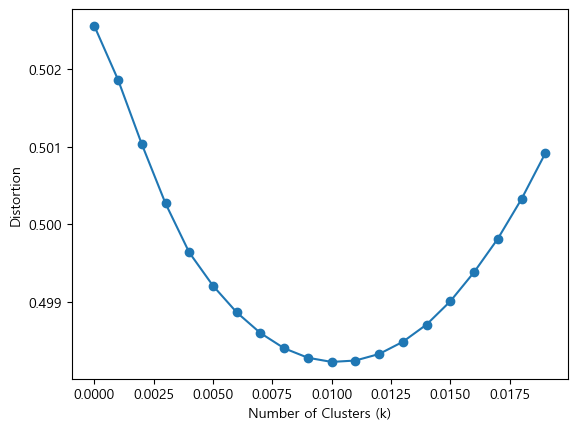

In [42]:
# 조건 탐색에 사용될 alpha 파라미터의 값들을 정의
alphas = np.arange(0, 0.02, 0.001)

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
rmse_result = list()

for alpha in alphas :
    model = ElasticNet(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    rmse_result.append(avg_rmse)
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.5f} '.format(alpha,avg_rmse))
    
# alpha 에 따른 rmse의 변화를 확인하여 그래프가 급격히 변하는 지점으로 k값 선정
plt.plot( alphas, rmse_result, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

## 최소 RMSE 조건으로 회귀분석 수행

In [43]:
x = df_house.iloc[:, 1:14]
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = ElasticNet(alpha = 0.01)
fit_model = model.fit(x,y)

In [44]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

     features         coeff
0   intercept  2.103668e-16
1        CRIM -3.211584e-01
2          ZN -6.000935e-03
3       INDUS -5.868411e-03
4        CHAS  5.728398e-02
5         NOX -1.430902e-01
6          RM  1.050070e-01
7         AGE  3.324876e-02
8         DIS -2.264629e-01
9         RAD  2.666224e-01
10        TAX -1.181465e-01
11    PTRATIO -1.703195e-01
12          B  7.665210e-02
13      LSTAT -5.885883e-01

 5 folds 의 개별 Negative MSE scores:  [-0.097 -0.141 -0.169 -0.605 -0.38 ]
 5 folds 의 개별 RMSE scores :  [0.311 0.375 0.411 0.778 0.616]
 5 folds 의 평균 RMSE : 0.498 



In [45]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.797
Adj. R-squared : 0.7916

F-statistic : 148.5672
p-value (of F-stat.) 0.0

      Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0   Intercept        0.0000            0.020        0.000          1.000
1        CRIM       -0.3212            0.050       -6.440          0.000
2          ZN       -0.0060            0.032       -0.188          0.851
3       INDUS       -0.0059            0.040       -0.147          0.884
4        CHAS        0.0573            0.021        2.708          0.007
5         NOX       -0.1431            0.046       -3.142          0.002
6          RM        0.1050            0.028        3.686          0.000
7         AGE        0.0332            0.031        1.057          0.291
8         DIS       -0.2265            0.045       -5.024          0.000
9         RAD        0.2666            0.047        5.720          0.000
10        TAX       -0.1181            0.044       -2.693          0.007
11    PTRATIO       -0.1703     

## t-통계량의 p값을 참고하여 유의하지 않은 변수 삭제하여 재진행

In [46]:
x = df_house.iloc[:, 1:14].drop(['ZN', 'INDUS', 'AGE'], axis =1)
y = df_house.iloc[:, 0]

# 회귀모델 생성 및 적합
model = ElasticNet(alpha = 0.01)
fit_model = model.fit(x,y)

In [47]:
# 적합된 모델에 의해 예측된 회귀계수 출력
feature_list = np.append('intercept', x.columns)
params = np.append(fit_model.intercept_, fit_model.coef_)

pred_coef = pd.DataFrame( { 'features' : feature_list,
                            'coeff' : params } )
print(pred_coef)
print()

# 적합된 모델의 RMSE를 Cross Validation 으로 산출
neg_mse_scores = cross_val_score(fit_model, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print()

     features         coeff
0   intercept  1.986541e-16
1        CRIM -3.243953e-01
2        CHAS  5.841669e-02
3         NOX -1.362672e-01
4          RM  1.112251e-01
5         DIS -2.427879e-01
6         RAD  2.676030e-01
7         TAX -1.237718e-01
8     PTRATIO -1.674301e-01
9           B  7.756197e-02
10      LSTAT -5.759348e-01

 5 folds 의 개별 Negative MSE scores:  [-0.099 -0.135 -0.163 -0.595 -0.377]
 5 folds 의 개별 RMSE scores :  [0.314 0.368 0.403 0.771 0.614]
 5 folds 의 평균 RMSE : 0.494 



In [48]:
n = len(y)
k = len(x.columns)

# R-squared
r2 = fit_model.score(x, y)

# Adj. R-squared
r2_adj = 1 - ( len(y) - 1 )*( 1 - fit_model.score(x, y) ) / ( len(y) - x.shape[1] - 1 )

# F-statistic
f_stat = ( r2 / (1-r2) )*( (n-k-1) / k )
p_val = 1 - stats.f.cdf(f_stat, k, n-k-1)

print('R-squared :', r2.round(4))
print('Adj. R-squared :', r2_adj.round(4) )
print()
print('F-statistic :', f_stat.round(4) )
print('p-value (of F-stat.)', p_val.round(4))
print()


# 통계량 계산을 위한 데이터프레임 생성
newX = pd.DataFrame( { "Intercept" : np.ones(len(x)) } ).join(pd.DataFrame(x).reset_index()).drop(['index'], axis=1)

# 회귀계수
params = np.append(fit_model.intercept_, fit_model.coef_)

# MSE
pred = fit_model.predict(x)
MSE = ( sum( (y-pred)**2 ) ) / (len(newX)-len(newX.columns))
# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-pred)**2))/(len(newX)-len(newX[0]))

# Var
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())

# 표준오차 (Standard Errors)
sd_b = np.sqrt(var_b)

# t-통계량
ts_b = params/ sd_b

# p-value
p_values = [ 2*( 1-stats.t.cdf( np.abs(i), (len(newX)-len(newX.columns)-1 ))) for i in ts_b ]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

result = pd.DataFrame()
result['Feature'], result["Coefficients"], result["Standard Errors"], result["t-statistic"], result["Probabilities"] = [ newX.columns, params, sd_b, ts_b, p_values ]

print(result)
print()

R-squared : 0.7961
Adj. R-squared : 0.792

F-statistic : 193.2603
p-value (of F-stat.) 0.0

      Feature  Coefficients  Standard Errors  t-statistic  Probabilities
0   Intercept        0.0000            0.020        0.000          1.000
1        CRIM       -0.3244            0.049       -6.586          0.000
2        CHAS        0.0584            0.021        2.797          0.005
3         NOX       -0.1363            0.044       -3.125          0.002
4          RM        0.1112            0.028        4.018          0.000
5         DIS       -0.2428            0.038       -6.352          0.000
6         RAD        0.2676            0.047        5.747          0.000
7         TAX       -0.1238            0.042       -2.942          0.003
8     PTRATIO       -0.1674            0.025       -6.807          0.000
9           B        0.0776            0.023        3.387          0.001
10      LSTAT       -0.5759            0.033      -17.202          0.000



### 다중공선성 확인

In [49]:
# VIF 확인
VIF = pd.DataFrame()

VIF['features'] = newX.columns
VIF['VIF factor'] = [ variance_inflation_factor(newX.values, i) for i in range(newX.shape[1]) ]

VIF.round(3)

,features,VIF factor
0,Intercept,1.000
1,CRIM,5.889
2,CHAS,1.059
3,NOX,4.617
4,RM,1.860
5,DIS,3.546
6,RAD,5.263
7,TAX,4.297
8,PTRATIO,1.469
9,B,1.273
